In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

#### data cleaning

In [36]:
def load_dataset(dataset_config, relative_path = "raw"):
    root = dataset_config["root"]
    relative_path = dataset_config["relative_paths"][relative_path]
    g_expr = os.path.join(root, relative_path, "*/*/*")
    imgs = glob(g_expr)
    return imgs

def resize(img_path, new_size, method = cv2.INTER_LINEAR):
    img = plt.imread(img_path)
    *size, _ = img
    resized_img = np.copy(img)
    if size != new_size:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(img,  new_size, interpolation = method)
    return resized_img

def _plot_comparison(raw_img, alt_img):
    fig, ax = plt.subplots(2,1)
    ax[0].imshow(raw_img)
    ax[1].imshow(alt_img)

def save_to(relative_path, img_path, img):
    path_components = img_path.split(os.path.sep)
    img_name = path_components[-1].strip()
    try:
        raw_index = path_components.index("raw")
        path_components[raw_index] = relative_path
        sep = os.path.sep
        path_str = sep.join(path_components)
        exit_code = cv2.imwrite(path_str, img)
        if exit_code:
            print(img_name, "saved successfully!")
    except ValueError:
        print("Skipping", img_name)

def normalize_scale(img):
    norm = np.copy(img)
    normalized_img = cv2.normalize(img, norm, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    return normalized_img

def sanitise(dataset_config, new_size):
    raw_dataset = load_dataset(dataset_config, "raw")

    for img_path in raw_dataset[:1]:
        # read image
        raw_img = plt.imread(img_path)
        # resize it to 256x256
        resized_img = resize(img_path, new_size)
        # normalize values between 0-1
        clean_img = normalize_scale(resized_img)
        save_to("cleaned", img_path, clean_img)

[[[0.43678162 0.79310346 0.7816092 ]
  [0.37931034 0.7356322  0.72413796]
  [0.40229887 0.7586207  0.74712646]
  ...
  [0.3678161  0.62068963 0.48275864]
  [0.27586207 0.51724136 0.41379312]
  [0.24137932 0.48275864 0.37931034]]

 [[0.42528737 0.7816092  0.77011496]
  [0.42528737 0.7816092  0.77011496]
  [0.40229887 0.7586207  0.74712646]
  ...
  [0.22988507 0.48275864 0.3448276 ]
  [0.18390805 0.42528737 0.3218391 ]
  [0.25287357 0.4942529  0.3908046 ]]

 [[0.41379312 0.77011496 0.7586207 ]
  [0.4597701  0.81609195 0.80459774]
  [0.41379312 0.77011496 0.7586207 ]
  ...
  [0.16091955 0.3908046  0.24137932]
  [0.25287357 0.48275864 0.3448276 ]
  [0.37931034 0.6091954  0.47126436]]

 ...

 [[0.4597701  0.77011496 0.88505745]
  [0.4942529  0.80459774 0.9195402 ]
  [0.51724136 0.82758623 0.9425287 ]
  ...
  [0.41379312 0.5862069  0.4942529 ]
  [0.3448276  0.52873564 0.40229887]
  [0.3218391  0.50574714 0.37931034]]

 [[0.4942529  0.80459774 0.9195402 ]
  [0.47126436 0.7816092  0.8965517 ]


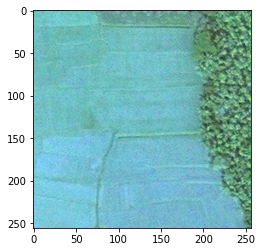

In [37]:
DATASET_CONFIG = {
    "root" : "../datasets",
    "relative_paths" : {
        "raw" : "raw", 
        "cleaned" : "cleaned"
    }
}

new_size = (256, 256)

sanitise(DATASET_CONFIG, new_size)

#### data pre-processing

In [13]:
def convert_to_gs(img):
    gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gs_img
